# Classification Task Regression Tree

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915) 
  
# data (as pandas dataframes) 
X = differentiated_thyroid_cancer_recurrence.data.features 
y = differentiated_thyroid_cancer_recurrence.data.targets 
  
# variable information 
print(differentiated_thyroid_cancer_recurrence.variables) 



                    name     role         type demographic description units  \
0                    Age  Feature      Integer         Age        None  None   
1                 Gender  Feature  Categorical      Gender        None  None   
2                Smoking  Feature  Categorical        None        None  None   
3             Hx Smoking  Feature  Categorical        None        None  None   
4        Hx Radiothreapy  Feature  Categorical        None        None  None   
5       Thyroid Function  Feature  Categorical        None        None  None   
6   Physical Examination  Feature  Categorical        None        None  None   
7             Adenopathy  Feature  Categorical        None        None  None   
8              Pathology  Feature  Categorical        None        None  None   
9               Focality  Feature  Categorical        None        None  None   
10                  Risk  Feature  Categorical        None        None  None   
11                     T  Feature  Categ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.concat([X, y], axis=1)  # Concatenating along column

In [4]:
#Convert string categorical columns to integers

encoder = LabelEncoder()

# Apply LabelEncoder to each categorical string column
for column in df.columns:
    if df[column].dtype == 'object':  # Only apply to object type columns
        df[column] = encoder.fit_transform(df[column])

df

Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0     27       0        0           0                0                 2   
1     34       0        0           1                0                 2   
2     30       0        0           0                0                 2   
3     62       0        0           0                0                 2   
4     62       0        0           0                0                 2   
..   ...     ...      ...         ...              ...               ...   
378   72       1        1           1                1                 2   
379   81       1        1           0                1                 2   
380   72       1        1           1                0                 2   
381   61       1        1           1                1                 0   
382   67       1        1           0                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                       3           3          2         1     2  0  0  0   
1                       1           3          2         1     2  0  0  0   
2                       4           3          2         1     2  0  0  0   
3                       4           3          2         1     2  0  0  0   
4                       1           3          2         0     2  0  0  0   
..                    ...         ...        ...       ...   ... .. .. ..   
378                     4           5          3         1     0  6  2  1   
379                     1           1          3         0     0  6  2  1   
380                     1           0          3         0     0  6  2  1   
381                     1           1          1         0     0  6  2  0   
382                     1           0          3         0     0  6  2  0   

     Stage  Response  Recurred  
0        0         2         0  
1        0         1         0  
2        0         1         0  
3        0         1         0  
4        0         1         0  
..     ...       ...       ...  
378      4         0         1  
379      4         3         1  
380      4         3         1  
381      3         3         1  
382      3         3         1  

[383 rows x 17 columns]

In [5]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

# EDA

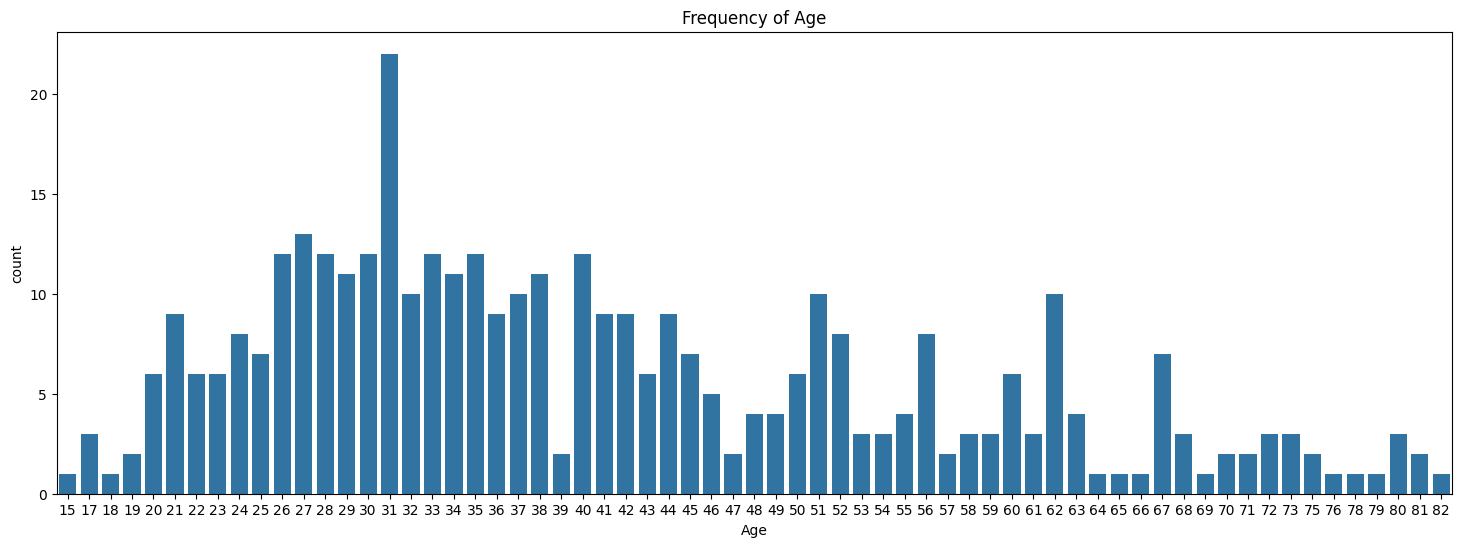

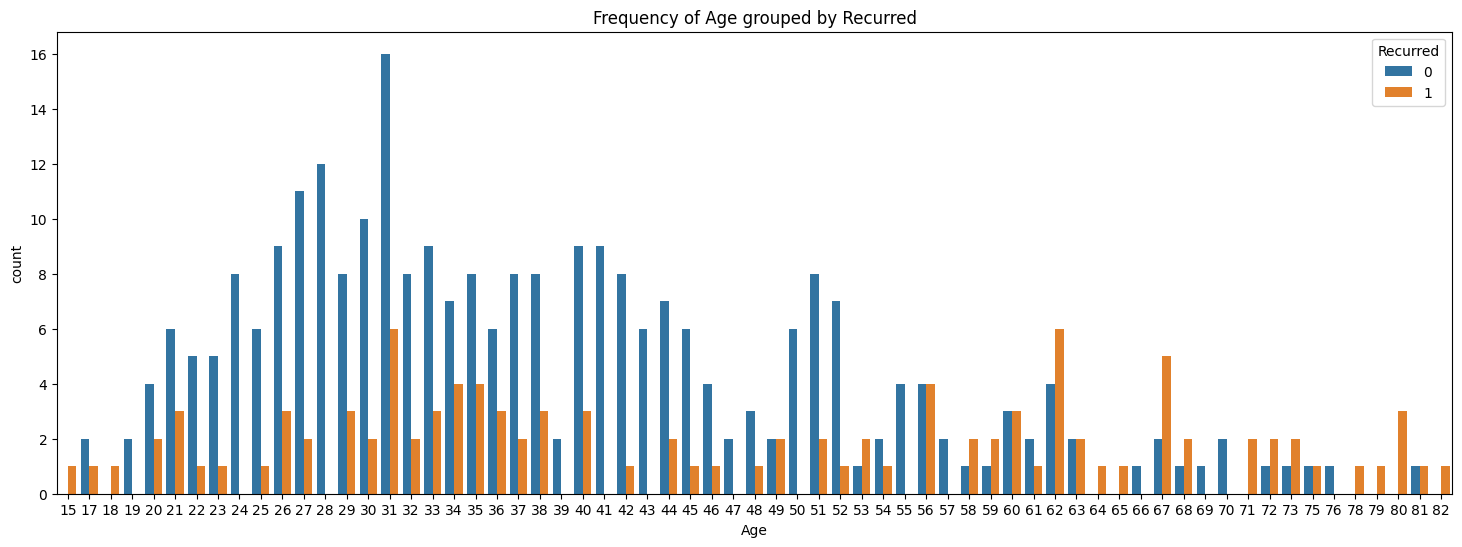

In [6]:
# Increase the figure size
plt.figure(figsize=(18, 6))  # Width of 14 inches and height of 6 inches

# Assuming df is your DataFrame
sns.countplot(x='Age', data=df)
plt.title('Frequency of Age')
plt.show()

# Increase the figure size again for the next plot
plt.figure(figsize=(18, 6))  # Adjust width and height as needed

# There's a typo in your code, correcting it here. `width` is not a valid argument for `sns.countplot`
sns.countplot(x='Age', hue='Recurred', data=df)
plt.title('Frequency of Age grouped by Recurred')
plt.show()

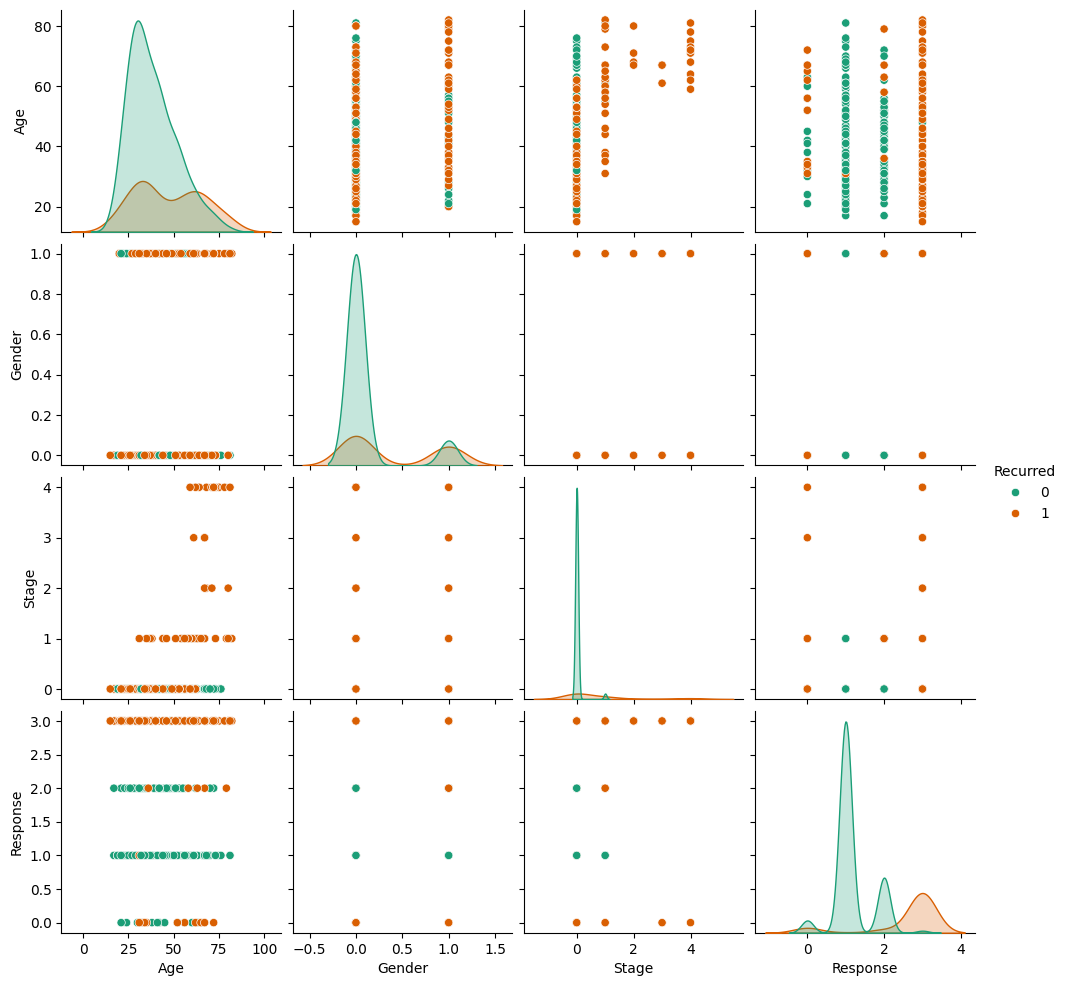

In [7]:
sns.pairplot(df.iloc[:,[0,1,14,15,16]],hue='Recurred',palette='Dark2')

# Train | Test Split 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
base_pred = model.predict(X_test)

## Evaluate

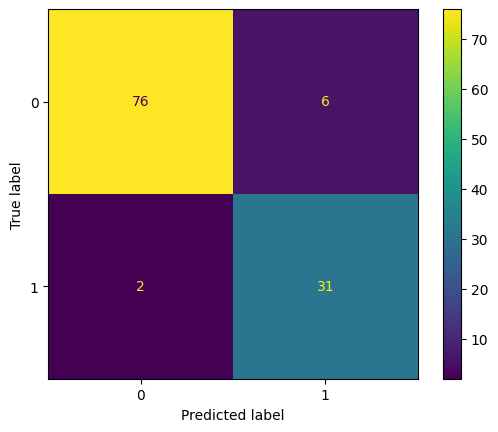

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and X_test, y_test are your test datasets.
# First, you need to predict the test set outcomes.
y_pred = model.predict(X_test)

# Now, compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Then, create the display object for the confusion matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Finally, use the display object to plot the matrix.
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [16]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        82
           1       0.84      0.94      0.89        33

    accuracy                           0.93       115
   macro avg       0.91      0.93      0.92       115
weighted avg       0.94      0.93      0.93       115



In [17]:
model.feature_importances_

array([0.06864396, 0.02393817, 0.        , 0.        , 0.        ,
       0.02482892, 0.        , 0.03471503, 0.00462867, 0.        ,
       0.01787548, 0.        , 0.01657258, 0.        , 0.06832875,
       0.74046843])

In [18]:
pd.DataFrame(index=df.drop('Recurred', axis=1).columns,data=model.feature_importances_,columns=['Feature Importance'])

Feature Importance
Age                             0.068644
Gender                          0.023938
Smoking                         0.000000
Hx Smoking                      0.000000
Hx Radiothreapy                 0.000000
Thyroid Function                0.024829
Physical Examination            0.000000
Adenopathy                      0.034715
Pathology                       0.004629
Focality                        0.000000
Risk                            0.017875
T                               0.000000
N                               0.016573
M                               0.000000
Stage                           0.068329
Response                        0.740468

# Visualize Tree

In [31]:
from sklearn.tree import plot_tree

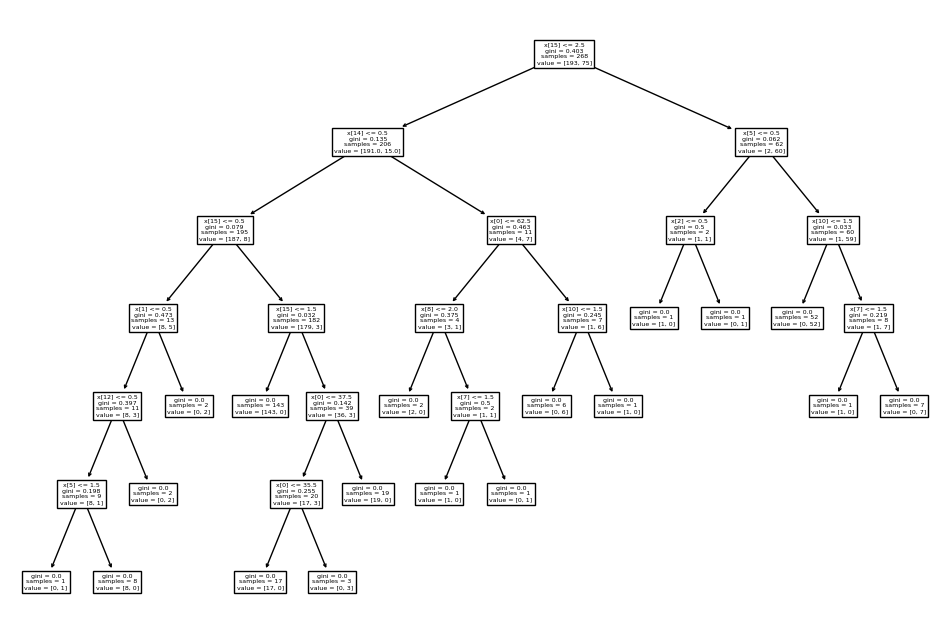

In [32]:
plt.figure(figsize=(12,8))
plot_tree(model);

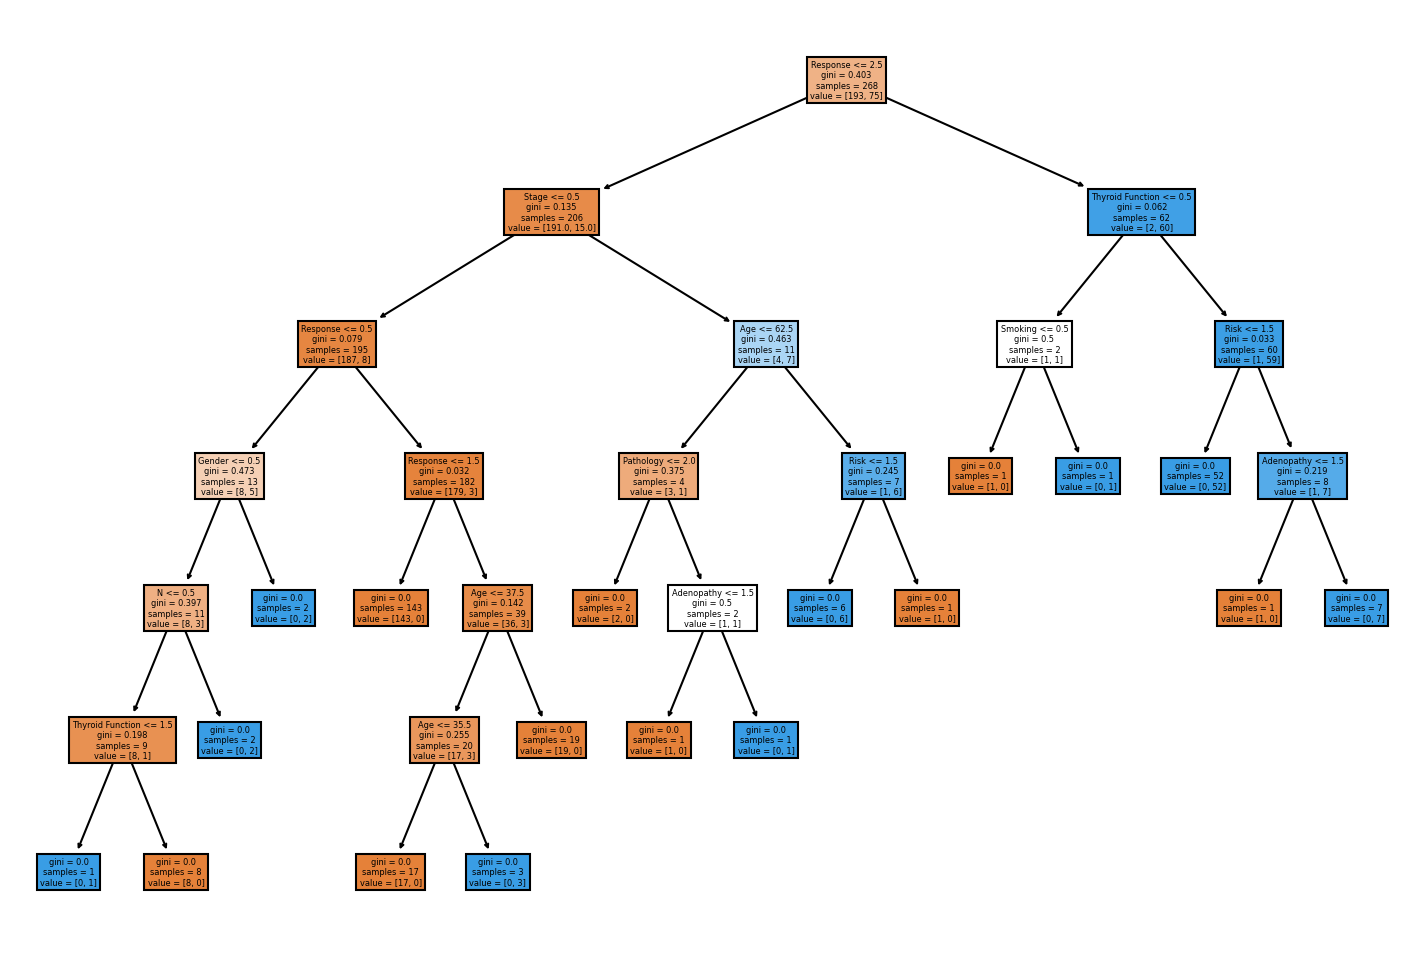

In [34]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=df.drop('Recurred', axis=1).columns,);

# Reporting Model Results
To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots 

In [38]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=df.drop('Recurred', axis=1).columns,);

In [39]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        82
           1       0.91      0.88      0.89        33

    accuracy                           0.94       115
   macro avg       0.93      0.92      0.92       115
weighted avg       0.94      0.94      0.94       115





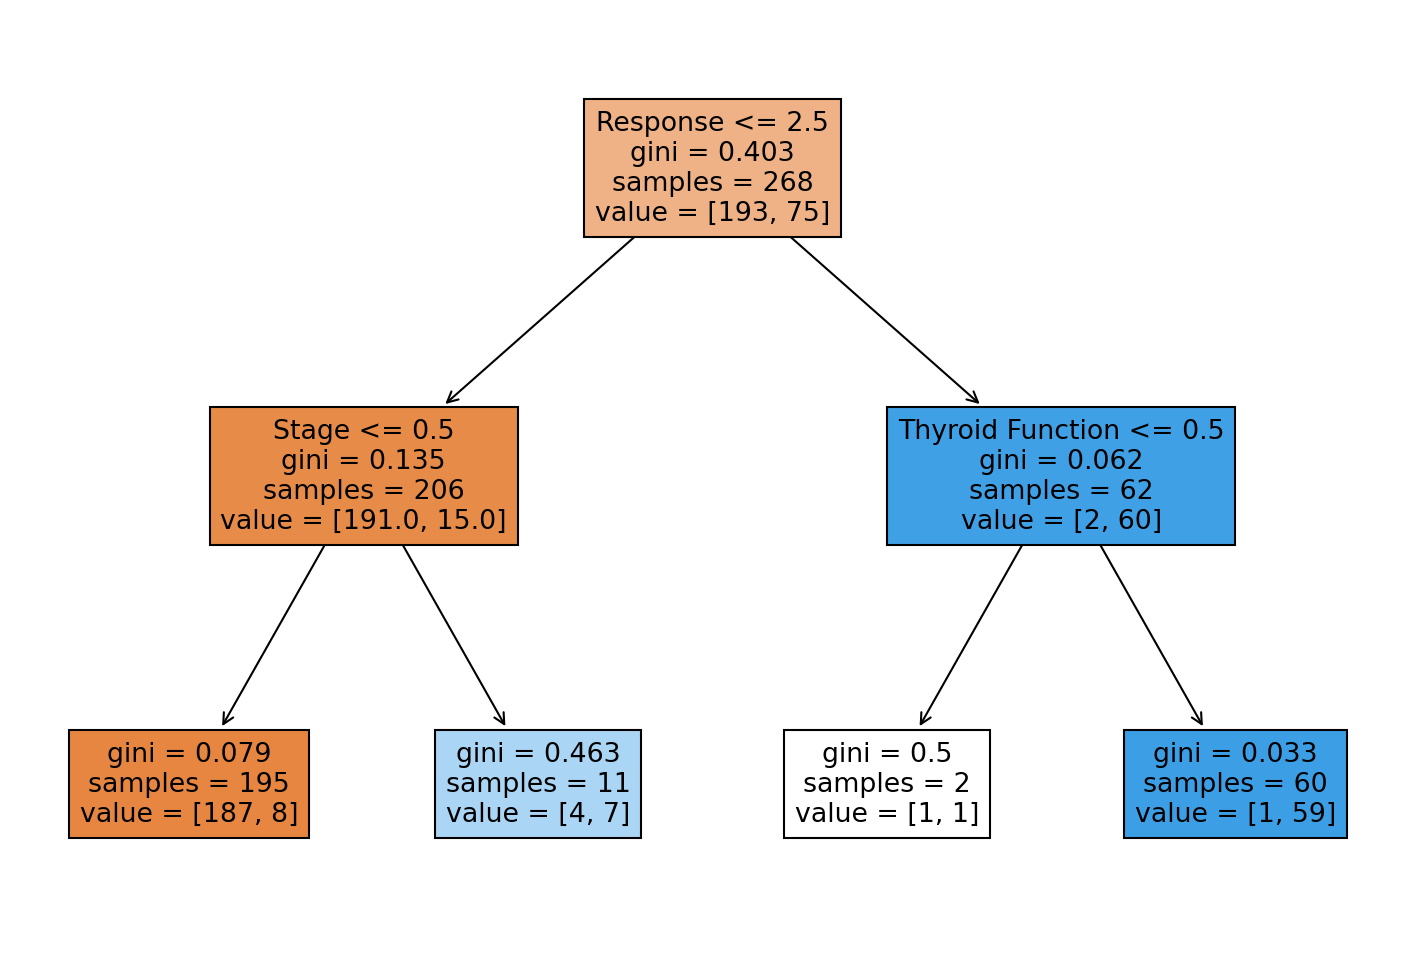

In [40]:
report_model(pruned_tree)

# Max Leaf Nodes

In [41]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        82
           1       0.91      0.91      0.91        33

    accuracy                           0.95       115
   macro avg       0.94      0.94      0.94       115
weighted avg       0.95      0.95      0.95       115





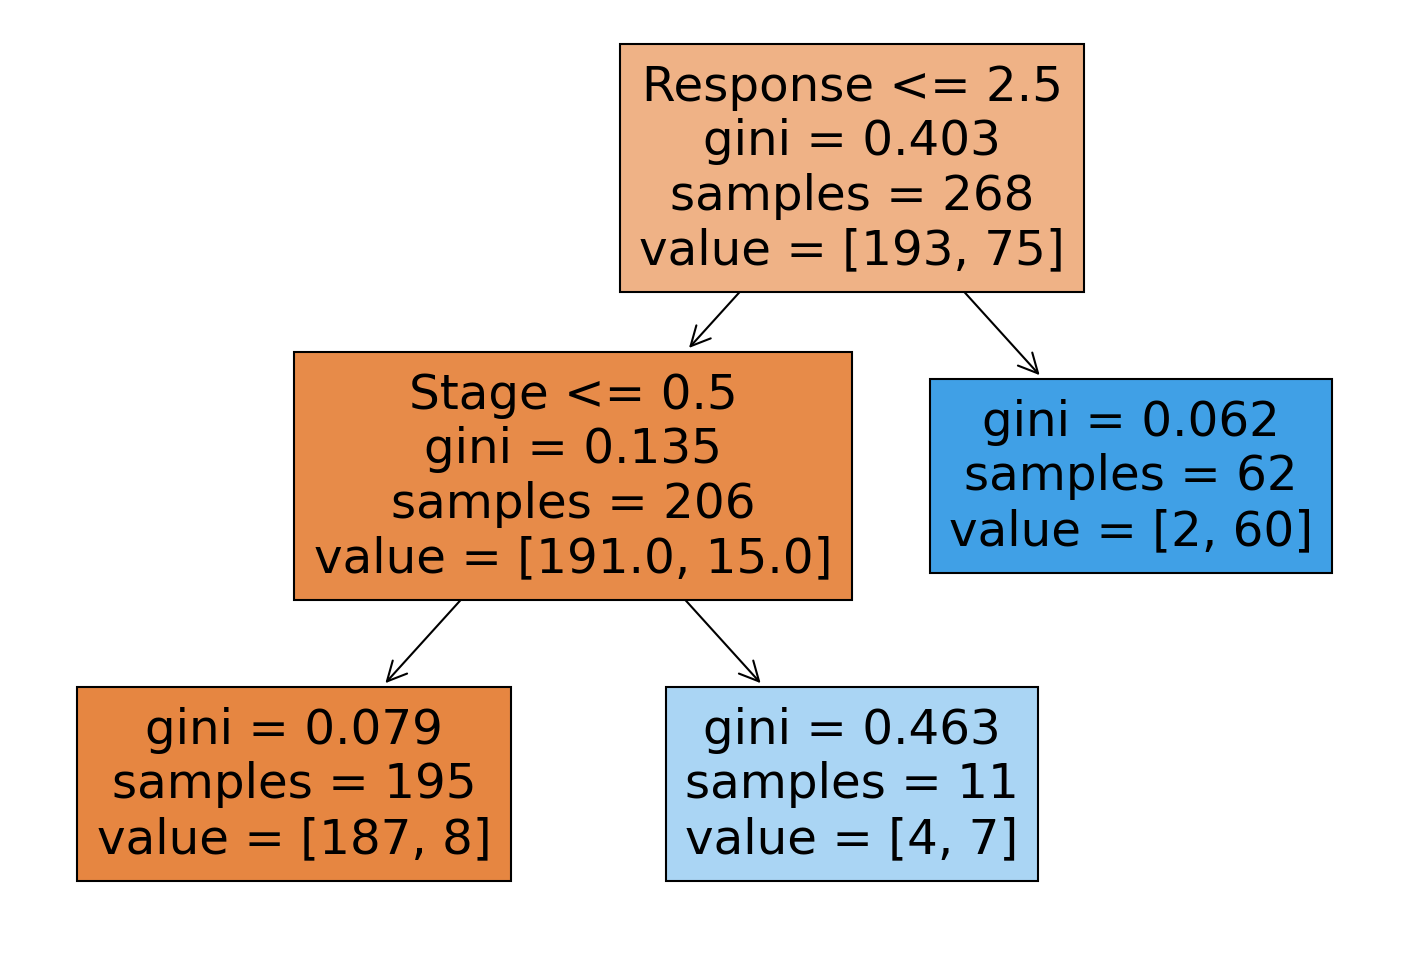

In [42]:
report_model(pruned_tree)

# Criterion

In [43]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        82
           1       0.82      0.97      0.89        33

    accuracy                           0.93       115
   macro avg       0.90      0.94      0.92       115
weighted avg       0.94      0.93      0.93       115





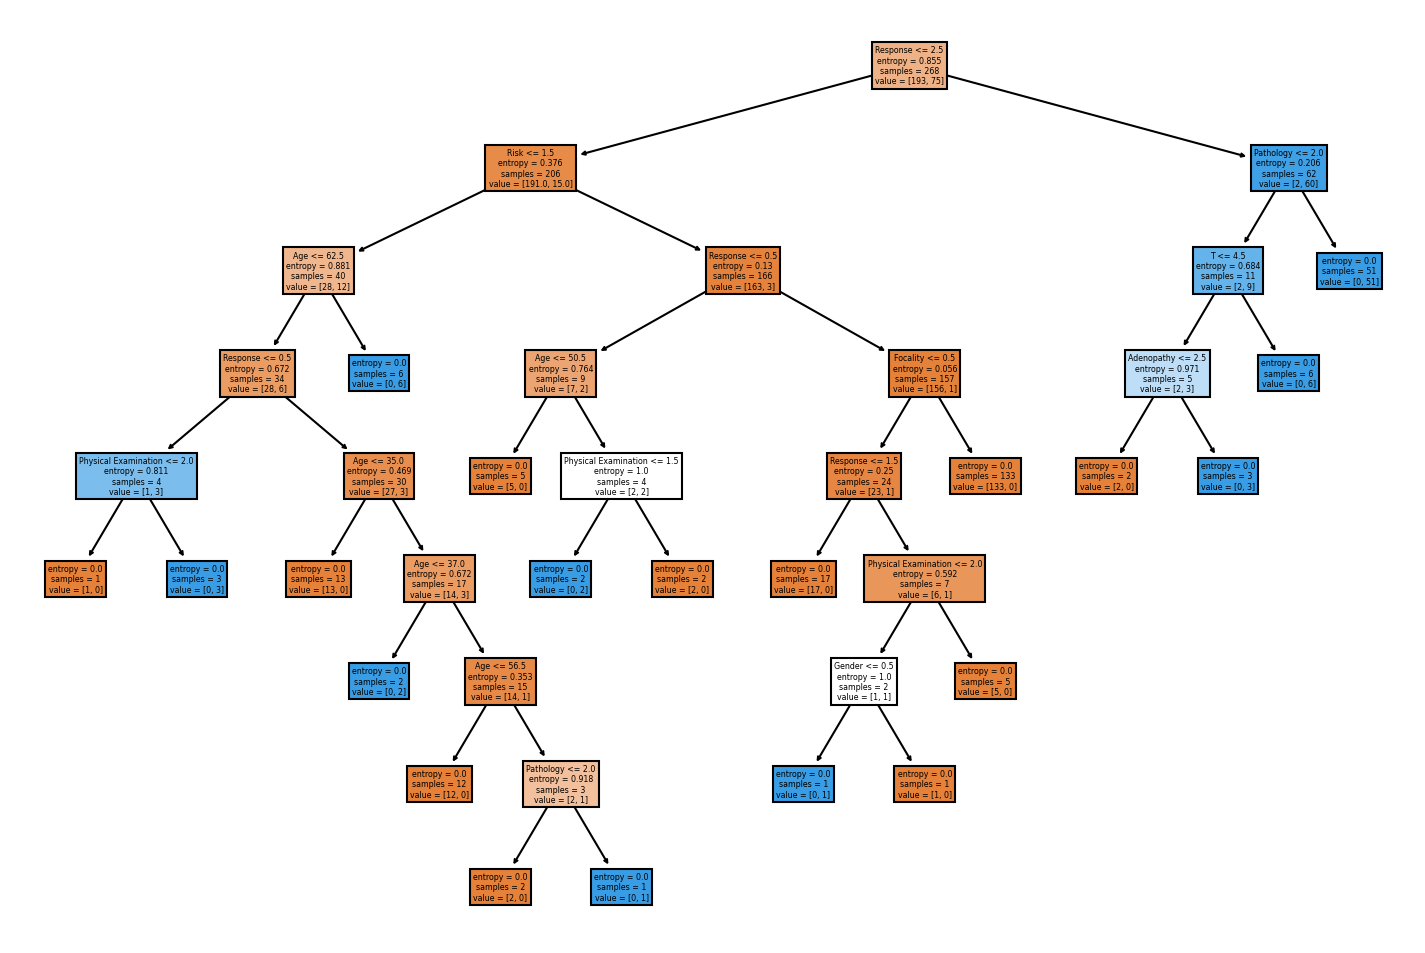

In [44]:
report_model(entropy_tree)